In [4]:
texts = []
with open("Reviews.csv", encoding="utf-8") as f:
    for i, line in enumerate(f):
        if i >= 1000:
            break
        if line.strip():
            texts.append(line.strip())


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)  
tfidf_matrix = vectorizer.fit_transform(texts)
print(tfidf_matrix.toarray())
feature_names = vectorizer.get_feature_names_out()
for idx, word in enumerate(feature_names):
    print(f"{idx}: {word}")

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0: 00
1: 10
2: 100
3: 11
4: 12
5: 13
6: 15
7: 16
8: 20
9: 24
10: 25
11: 30
12: 50
13: 99
14: able
15: about
16: absolutely
17: acai
18: acid
19: actual
20: actually
21: add
22: added
23: addicted
24: adding
25: addition
26: adult
27: advertised
28: after
29: aftertaste
30: again
31: agave
32: ago
33: ahmad
34: all
35: allergic
36: allergies
37: almost
38: along
39: already
40: also
41: alternative
42: although
43: altoids
44: always
45: am
46: amazing
47: amazon
48: amount
49: an
50: and
51: another
52: any
53: anymore
54: anyone
55: anything
56: anyway
57: anywhere
58: apple
59: apples
60: are
61: aren
62: aroma
63: around
64: arrived
65: artificial
66: as
67: ask
68: asparagus
69: at
70: ate
71: available
72: away
73: awesome
74: awful
75: b000er6yo0
76: b000g6mbx2
77: b000g6ryne
78: b000hdmuq2
79: b000lkzk7c
80: b000s806vm
81: b0

In [6]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
sentences = [doc.lower().split() for doc in texts]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1)  # min_count=1 żeby działało nawet na małym zbiorze
print("Podobieństwo 'food' i 'good':", model.wv.similarity('food', 'good'))  # wartości od -1 do 1
print("Najbardziej podobne do 'food':")
print(model.wv.most_similar('food'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\48664\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Podobieństwo 'food' i 'good': 0.99985147
Najbardziej podobne do 'food':
[('just', 0.999893307685852), ('in', 0.9998893737792969), ('and', 0.9998839497566223), ('also', 0.9998823404312134), ('from', 0.9998819231987), ('our', 0.9998814463615417), ('for', 0.9998805522918701), ('was', 0.9998801350593567), ('or', 0.999879777431488), ('but', 0.9998793601989746)]


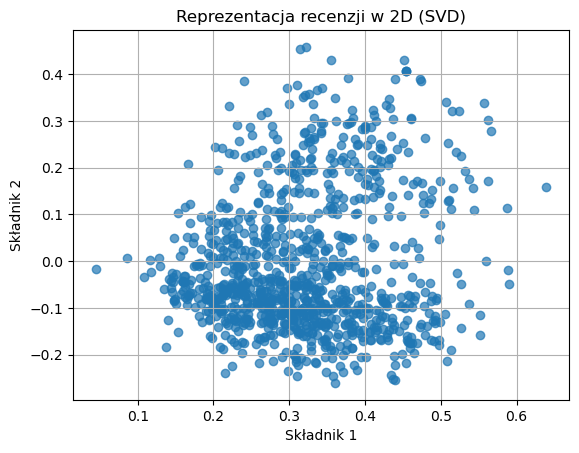

In [7]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Redukcja wymiarowości do 2D
svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(tfidf_matrix)

# Rysowanie wykresu
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7)
plt.title("Reprezentacja recenzji w 2D (SVD)")
plt.xlabel("Składnik 1")
plt.ylabel("Składnik 2")
plt.grid(True)
plt.show()